In [1]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.models import load_model

In [3]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') >= 0.96):   
            print("Reached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [33]:
EPOCHS =100
INIT_LR = 3e-3
BS = 15
default_image_size = tuple((224, 224))
#image_size = 0
width=224
height=224
depth=3
train_dir=r"C:\Users\Glau\Desktop\marine_new\Augmentation\Train"
valid_dir=r"C:\Users\Glau\Desktop\marine_new\Augmentation\Test"
train_folder=listdir(train_dir)
valid_folder=listdir(valid_dir)

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
callbacks = MyCustomCallback()

In [6]:
train_image_list, train_image_label= [], []
for disease_folder in train_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{train_dir}/{disease_folder}")
    #print(disease_img_folder)
    for disease_img in disease_img_folder:
    #for disease_img in disease_img_folder[: : 2]:    
        image_directory = f"{train_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".TIFF") == True:
            train_image_list.append(convert_image_to_array(image_directory))
            train_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing Amphidinium carterae ...
processing Chatonella marina ...
processing Cochlodinium ...
processing Coolia monotis ...
processing Dinophysis forti ...
processing Gambierdiscus toxicus ...
processing Gymnodinium catenatum ...
processing Karenia brevis ...
processing Karlodinium ...
processing Lyngbya majuscula ...
processing Ostreopsis siamensis ...
processing Protoceratium reticulatum ...
processing Prymnesium parvum ...
processing Pseudo-nitzschia fraudulenta ...
processing Tolypothrix conglutinata ...
[INFO] Image loading completed


In [7]:
print(len(train_image_label))

72000


In [8]:
valid_image_list, valid_image_label= [], []
for disease_folder in valid_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{valid_dir}/{disease_folder}")
    for disease_img in disease_img_folder:
    #for disease_img in disease_img_folder[: : 2]: 
        image_directory = f"{valid_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".TIFF") == True:
            valid_image_list.append(convert_image_to_array(image_directory))
            valid_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing Amphidinium carterae ...
processing Chatonella marina ...
processing Cochlodinium polykrikoides ...
processing Coolia monotis ...
processing Dinophysis forti ...
processing Gambierdiscus toxicus ...
processing Gymnodinium catenatum ...
processing Karenia brevis ...
processing Karlodinium ...
processing Lyngbya majuscula ...
processing Ostreopsis siamensis ...
processing Protoceratium reticulatum ...
processing Prymnesium parvum ...
processing Pseudo-nitzschia fradulenta ...
processing Tolypothrix conglutinata ...
[INFO] Image loading completed


In [9]:
print(len(valid_image_label))

18000


In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
bin_train_image_labels = label_binarizer.fit_transform(train_image_label)
bin_valid_image_labels = label_binarizer.fit_transform(valid_image_label)
pickle.dump(label_binarizer,open('Label_Instance_marine2_vgg9.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [11]:
print(n_classes)

15


In [12]:
np_train_image_list = np.array(train_image_list, dtype=np.float32) / 255.0
np_valid_image_list = np.array(valid_image_list, dtype=np.float32) / 255.0

In [13]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os


#
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(15, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False


C:\Users\Glau\.conda\envs\tensorflow\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [34]:
model.compile(optimizer=RMSprop(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history=model.fit(np_train_image_list,bin_train_image_labels,
                  validation_data=(np_valid_image_list, bin_valid_image_labels),
                  batch_size=BS,
                  epochs=EPOCHS, verbose=1        
                  )

Train on 72000 samples, validate on 18000 samples
Epoch 1/100
72000/72000 [==============================] - 115s 2ms/sample - loss: 0.0574 - accuracy: 0.9812 - val_loss: 4.5301 - val_accuracy: 0.4024
Epoch 2/100
72000/72000 [==============================] - 113s 2ms/sample - loss: 0.0556 - accuracy: 0.9821 - val_loss: 4.7089 - val_accuracy: 0.3969
Epoch 3/100
72000/72000 [==============================] - 113s 2ms/sample - loss: 0.0557 - accuracy: 0.9819 - val_loss: 4.6640 - val_accuracy: 0.4004
Epoch 4/100
72000/72000 [==============================] - 113s 2ms/sample - loss: 0.0547 - accuracy: 0.9820 - val_loss: 4.6843 - val_accuracy: 0.3984
Epoch 5/100
72000/72000 [==============================] - 113s 2ms/sample - loss: 0.0539 - accuracy: 0.9829 - val_loss: 4.5832 - val_accuracy: 0.4033
Epoch 6/100
72000/72000 [==============================] - 113s 2ms/sample - loss: 0.0537 - accuracy: 0.9821 - val_loss: 4.5863 - val_accuracy: 0.4032
Epoch 7/100
72000/72000 [===================

In [36]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(np_valid_image_list, bin_valid_image_labels)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
18000/18000 [==============================] - 20s 1ms/sample - loss: 6.2875 - accuracy: 0.4068
Test Accuracy: 40.683332085609436


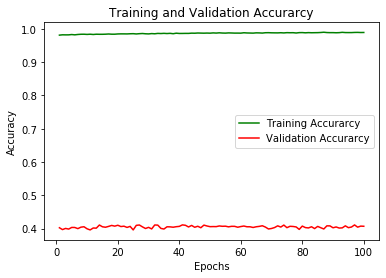

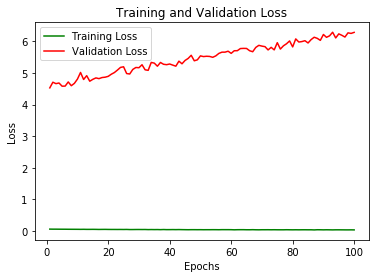

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
ycalculated = model.predict(np_valid_image_list)

In [39]:
yhat_classes =np.argmax(ycalculated,axis=1)

In [40]:
import numpy as np
rounded_labels=np.argmax(bin_valid_image_labels,axis=1)


In [41]:
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
#import seaborn as sns
#y_pred=model.predict_classes(np_valid_image_list)
#con_mat = tf.math.confusion_matrix(labels=y_true, predictions=ycalculated).numpy()
#matrix = confusion_matrix(rounded_labels,yhat_classes)
#y_pred=model.predict(np.array(val_image_list))
#yhat_classes = ["honda", "chevrolet", "honda", "toyota", "toyota", "chevrolet"]
#rounded_labels = ["honda", "chevrolet", "honda", "toyota", "toyota", "honda"]
cm =confusion_matrix(rounded_labels,yhat_classes)  

#matrix =confusion_matrix(bin_val_image_labels.argmax(axis=1), ycalculated)
print(cm)

[[   2  179    0   10    0  170  263    0    0    0  576    0    0    0
     0]
 [   0  834    0    0    0   25  141    0    0    0  200    0    0    0
     0]
 [   0  714  402    8    0    0   75    0    0    0    1    0    0    0
     0]
 [   0   35    0  504    0   36   10    0    0    0  613    2    0    0
     0]
 [   0    3    0  106  112  351   34    0    0    0  594    0    0    0
     0]
 [   0    9    0    0    0  856   10    0    0    0  325    0    0    0
     0]
 [   0   92    0   61    0    2  883    0    0    0  162    0    0    0
     0]
 [   0   88    0  222    0  101  474  108    0    0  207    0    0    0
     0]
 [   1   41    0  136    0  206   82    9    0    0  725    0    0    0
     0]
 [   0  259    0    1    0    3   25    0   19  712   89    1    0   87
     4]
 [   0   11    0    0    0  126   13    0    0    0 1050    0    0    0
     0]
 [   0  175    0  184    6   33  306    0    2    0  418   76    0    0
     0]
 [   0   96    0    1    0    8  147    

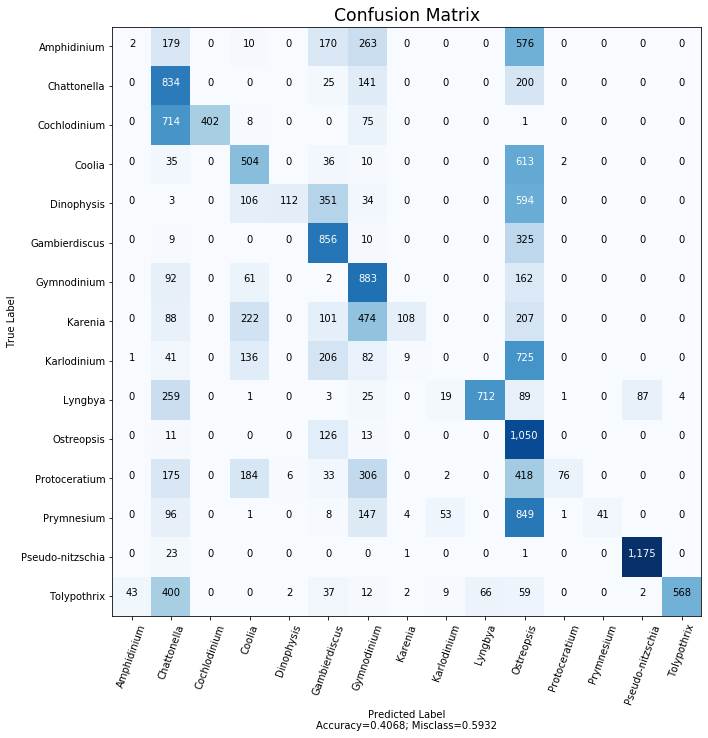

In [42]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 'xx-large')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=70)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm, 
                      normalize = False,
                      target_names=['Amphidinium','Chattonella','Cochlodinium','Coolia','Dinophysis','Gambierdiscus','Gymnodinium','Karenia','Karlodinium','Lyngbya',
 'Ostreopsis','Protoceratium','Prymnesium','Pseudo-nitzschia','Tolypothrix'],
                      title        = "Confusion Matrix")

In [43]:
from sklearn.metrics import accuracy_score,classification_report 
target_names =['Amphidinium','Chattonella','Cochlodinium','Coolia','Dinophysis','Gambierdiscus','Gymnodinium','Karenia','Karlodinium','Lyngbya',
 'Ostreopsis','Protoceratium','Prymnesium','Pseudo-nitzschia','Tolypothrix']
print(classification_report(rounded_labels, yhat_classes, target_names=target_names))

                  precision    recall  f1-score   support

     Amphidinium       0.04      0.00      0.00      1200
     Chattonella       0.28      0.69      0.40      1200
    Cochlodinium       1.00      0.34      0.50      1200
          Coolia       0.41      0.42      0.41      1200
      Dinophysis       0.93      0.09      0.17      1200
   Gambierdiscus       0.44      0.71      0.54      1200
     Gymnodinium       0.36      0.74      0.48      1200
         Karenia       0.87      0.09      0.16      1200
     Karlodinium       0.00      0.00      0.00      1200
         Lyngbya       0.92      0.59      0.72      1200
      Ostreopsis       0.18      0.88      0.30      1200
   Protoceratium       0.95      0.06      0.12      1200
      Prymnesium       1.00      0.03      0.07      1200
Pseudo-nitzschia       0.93      0.98      0.95      1200
     Tolypothrix       0.99      0.47      0.64      1200

        accuracy                           0.41     18000
       macro

In [44]:
class_to_label_map={ 0:'Amphidinium',1:'Chattonella',2:'Cochlodinium',3:'Coolia',4:'Dinophysis',5:'Gambierdiscus',6:'Gymnodinium',7:'Karenia',8:'Karlodinium',9:'Lyngbya',
 10:'Ostreopsis',11:'Protoceratium',12:'Prymnesium',13:'Pseudo-nitzschia',14:'Tolypothrix'}

C:\Users\Glau\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


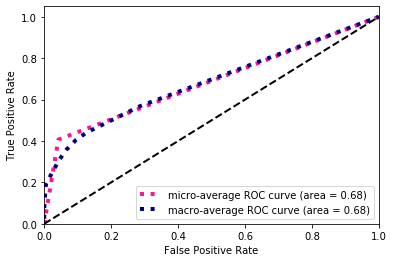

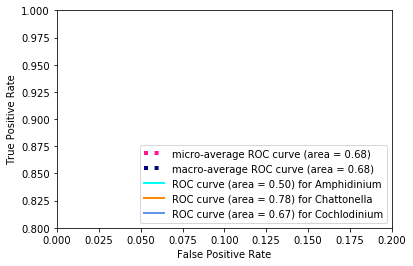

In [46]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes =15

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
lb = LabelBinarizer()
lb.fit(rounded_labels)
y_test= lb.transform(rounded_labels)
snn_pred = lb.transform(yhat_classes)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], snn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), snn_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
#plt.figure(figsize=(10,10)
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw,color='white')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic of Cell')
plt.legend(loc="lower right")
plt.show()